**About CarDekho**

CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

**Objective:**

Every passing day we can see that the car market is increasing rapidly and that brings us to a door where many people are buying and selling the cars in the market, so to make this process more fluid and with a better market view, I am proposing a model which will take particular information related to the car and will predict the selling price. This will help to get a better view while buying and selling cars.


**Predicting Description:**

I am predicting the selling price of the car based on various features of the cars including the present price of the cars, i will be using Multiple Linear Regression for building The model.


**Data Description:**

The dataset is from Cardekho.com, this dataset contains information about cars listed on the website cardekho.com.


**Attribute Information:**

The datasets consist of several independent variables include:

Car_Name : This column represents the name of the car.

Year : This column represents the year in which the car was bought.

Selling_Price : This column represents the price the owner wants to sell the car at.

Present_Price : This is the present price of the car.

Kms_Driven : This is the distance completed by the car in km.

Fuel_Type : Fuel type of car i.e Diesel,Petrol,CNG

Seller_Type : Defines whether the seller is a dealer or an individual.

Transmission : Defines whether the car is manual or automatic.

Owner : Defines the number of owners the car has previously had.


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



In [3]:
CarDekho_Data=pd.read_csv("Car_Data.csv")

In [4]:
CarDekho_Data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**Exploratory Data Analysis**

And lets drop the Car_name as it does not provide much insights.

In [5]:
CarDekho_Data.drop("Car_Name",axis=1,inplace=True)

now lets check how many null values are present in our data.

In [6]:
CarDekho_Data.isnull().sum().sort_values(ascending=False)

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Happily there is no null values,but if there is any null values we can fill them by mean,median,mode and more missing value filling techniques.

Now ,we would like to the the statistics like Count,mean,mode,std,quantiles..etc. of all our our Features/Variables.

In [7]:
CarDekho_Data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Lets,see what are the name of the columns of our Data Frame.

In [8]:
CarDekho_Data.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

Checking if there are any dublicates

In [9]:
CarDekho_Data.duplicated().any()

True

We have some dublicate values lets check what they are.

In [10]:
duplicateRowsDF = CarDekho_Data[CarDekho_Data.duplicated()]

Here we can see that the values which are dublicated are kms driven which is okay different cars can have the same kms driven.

In [11]:
duplicateRowsDF

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


**Plotting and finding Insights.**

As,we know the Owner Variable is object type lets convert it into object.

In [12]:
CarDekho_Data["Owner"]=CarDekho_Data["Owner"].astype("object")

Now we will jump into the Plots to get out insights.


Here we can see that:

> Most of the cars owned by the people are of Petrol Type.

> People are buying more petrol Cars then Diesel and CNG.








<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

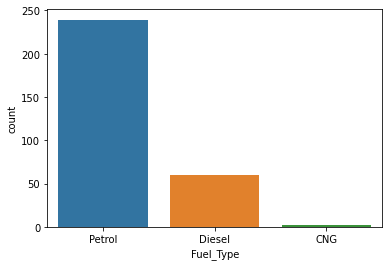

In [13]:
#Fuel type
figsize=(5,7)
sns.countplot(CarDekho_Data["Fuel_Type"])

Here we can see that:

> Most of the seller type is Dealers only.

> But we can see that Individual sellers are coming up  with the help of online marketplace.





<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

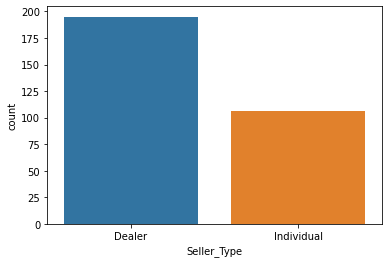

In [14]:
#Seller Type
figsize=(5,7)
sns.countplot(CarDekho_Data["Seller_Type"])

Here we can see that:

> Most of the preffered cars in transmission is Manual





<AxesSubplot:xlabel='Transmission', ylabel='count'>

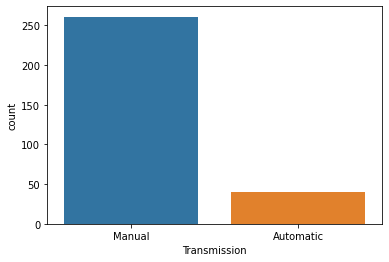

In [15]:
#Transmission 
figsize=(5,7)
sns.countplot(CarDekho_Data["Transmission"])

Here we can see that:

> Most of the cars are owned by the first owner.

> The second hand cars are less in number.





<AxesSubplot:xlabel='Owner', ylabel='count'>

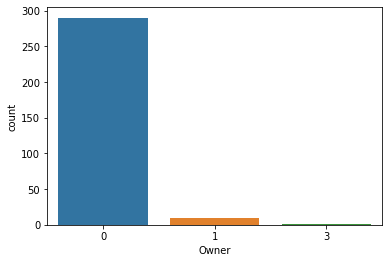

In [16]:
#Car Name 
figsize=(5,7)
sns.countplot(CarDekho_Data["Owner"])

In [17]:
CarDekho_Data.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

Here we can see that:

> In most of the year the Present price of the Car with the 1st owner is high.





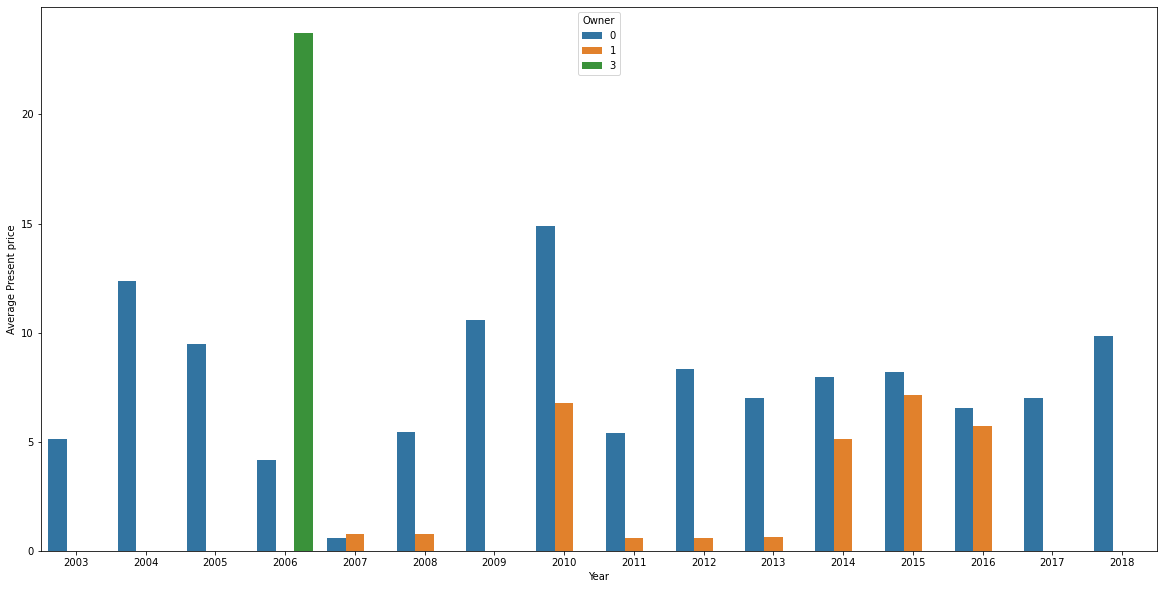

In [18]:
Year_trans=CarDekho_Data.groupby(["Year","Owner"])["Present_Price"].mean().reset_index()

plt.figure(figsize=(20,10))
sns.barplot(x="Year",y="Present_Price",hue="Owner",data=Year_trans)
plt.xlabel("Year")
plt.ylabel("Average Present price")
plt.show()

Here we can see that:

> when the car is sold at a price the high selling price is with the first car owners rather the second and third.



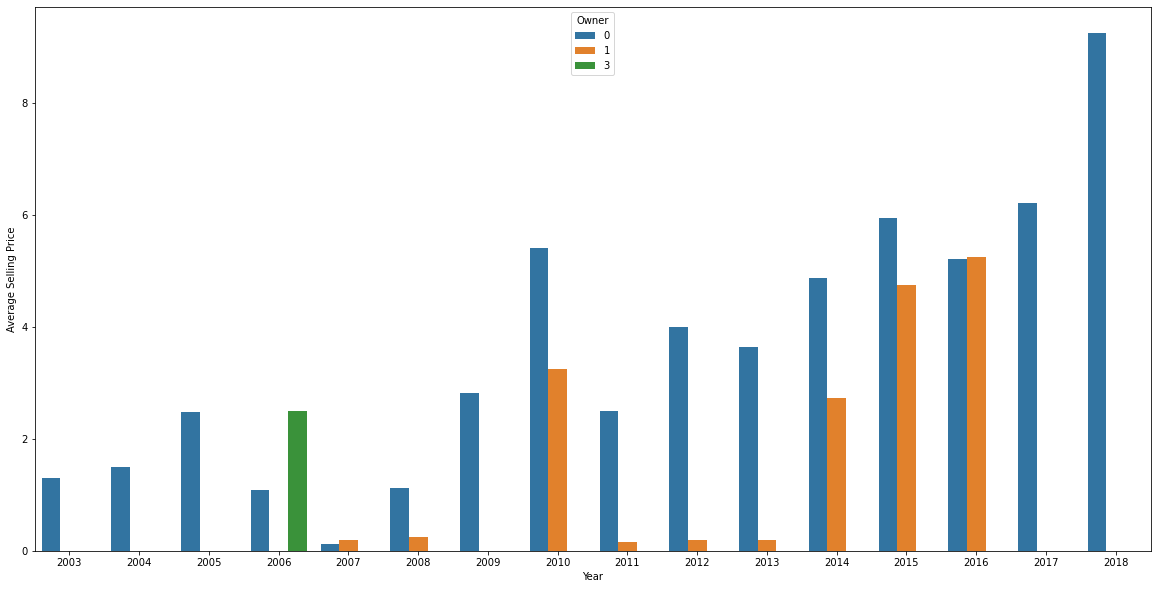

In [19]:
Year_trans_sell=CarDekho_Data.groupby(["Year","Owner"])["Selling_Price"].mean().reset_index()

plt.figure(figsize=(20,10))
sns.barplot(x="Year",y="Selling_Price",hue="Owner",data=Year_trans_sell)
plt.xlabel("Year")
plt.ylabel("Average Selling Price")
plt.show()

Here we can see that:

> The first owners have driven the less kms on average.

> Its Better to buy a car form first owner.





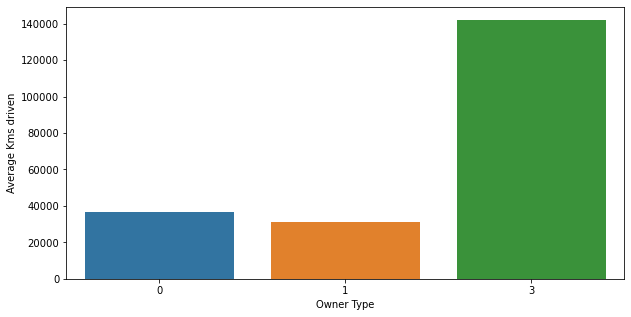

In [20]:
Owner_kms=CarDekho_Data.groupby(["Owner"])["Kms_Driven"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x="Owner",y="Kms_Driven",data=Owner_kms)
plt.xlabel("Owner Type")
plt.ylabel("Average Kms driven")
plt.show()

Here we can see that:


> The dealers are having/selling the cars which are on average driven 40 Thousand km driven which is a lot.

> where as the Individuals which are having/selling the cars which is driven 30 thousand km driven just 10000 less the dealers.

> Its better to buy a car from Individual if you want less km driven cars.







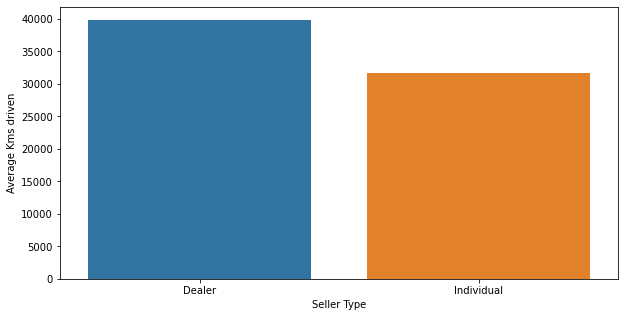

In [21]:
Seller_kms=CarDekho_Data.groupby(["Seller_Type"])["Kms_Driven"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x="Seller_Type",y="Kms_Driven",data=Seller_kms)
plt.xlabel("Seller Type")
plt.ylabel("Average Kms driven")
plt.show()

Here we can see that:

> The Automatic cars are most costly then the Manual cars.



<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

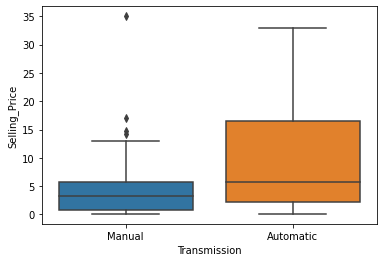

In [22]:
sns.boxplot(x="Transmission",y="Selling_Price",data=CarDekho_Data,)

Here we can see that:

> The dealers are selling the cars at a higher price ,as above seen they have the cars which have higher kms driven in that case price should be less.

> The Individuals are selling there cars at a lower price despite being less kms driven seen above.





<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

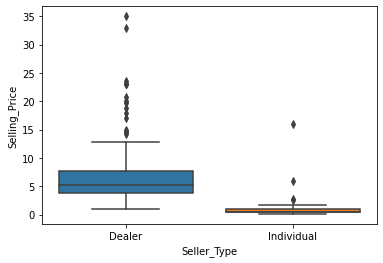

In [23]:
sns.boxplot(x="Seller_Type",y="Selling_Price",data=CarDekho_Data)

Lets take out The categorical Variables and label encode them.

In [24]:
Categorical_data=[]
Numerical_data=[]

for i,c in enumerate(CarDekho_Data.dtypes):
  if c==object:
    Categorical_data.append(CarDekho_Data.iloc[:,i])

  else:
    Numerical_data.append(CarDekho_Data.iloc[:,i])

In [25]:
Categorical_data=pd.DataFrame(Categorical_data).transpose()
Numerical_data=pd.DataFrame(Numerical_data).transpose()

In [26]:
Categorical_data.head()

,Fuel_Type,Seller_Type,Transmission,Owner
0,Petrol,Dealer,Manual,0
1,Diesel,Dealer,Manual,0
2,Petrol,Dealer,Manual,0
3,Petrol,Dealer,Manual,0
4,Diesel,Dealer,Manual,0


In [27]:
Numerical_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven
0,2014.0,3.35,5.59,27000.0
1,2013.0,4.75,9.54,43000.0
2,2017.0,7.25,9.85,6900.0
3,2011.0,2.85,4.15,5200.0
4,2014.0,4.60,6.87,42450.0


In [28]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [29]:
for i in Categorical_data:
  Categorical_data[i]=LE.fit_transform(Categorical_data[i])

In [30]:
Categorical_data.head()

,Fuel_Type,Seller_Type,Transmission,Owner
0,2,0,1,0
1,1,0,1,0
2,2,0,1,0
3,2,0,1,0
4,1,0,1,0


In [31]:
CarDekho_Data_Proces=pd.concat([Categorical_data,Numerical_data],axis=1)

In [32]:
CarDekho_Data_Proces.head()

,Fuel_Type,Seller_Type,Transmission,Owner,Year,Selling_Price,Present_Price,Kms_Driven
0,2,0,1,0,2014.0,3.35,5.59,27000.0
1,1,0,1,0,2013.0,4.75,9.54,43000.0
2,2,0,1,0,2017.0,7.25,9.85,6900.0
3,2,0,1,0,2011.0,2.85,4.15,5200.0
4,1,0,1,0,2014.0,4.60,6.87,42450.0


Here we can see that:

> The selling price and Present price have a correlation of 0.88

> The Selling Price is highly correlated with the Present Price,so we can use any one of the Variable for our analysis but not both.





<AxesSubplot:>

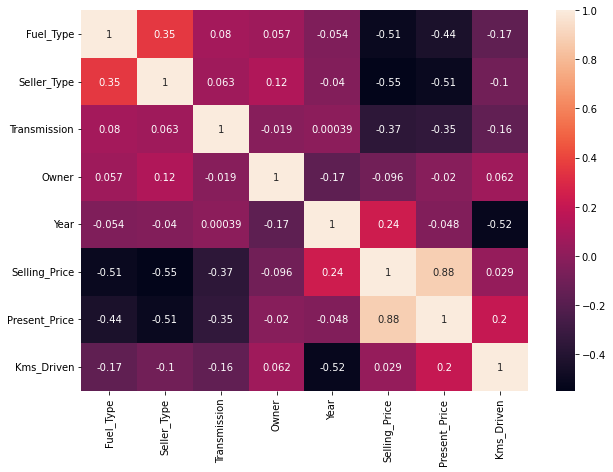

In [33]:
plt.figure(figsize=(10,7))
plt.title="Correlation Matrix"
sns.heatmap(CarDekho_Data_Proces.corr(),annot=True)

Now lets check if the we have Outliers in our data.

Here we can see that:

> The Kms_Driven shows that many of the data is Acting like a outliers.

> But with the Help of domain Knowledge we can say that the Cars can we any Kms Driven as it is based on the Owner and the Selling price of that cars Adjust accordingly.





<AxesSubplot:>

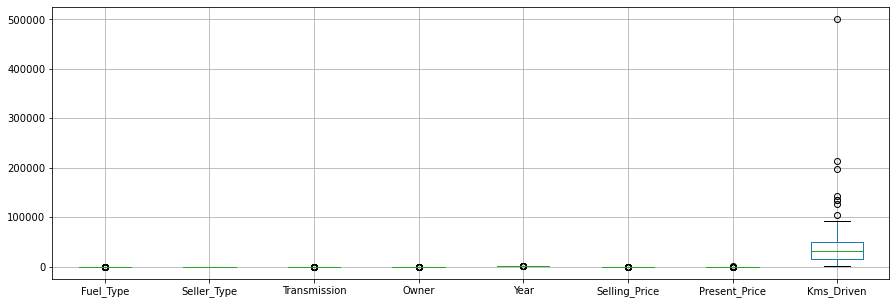

In [34]:
CarDekho_Data_Proces.boxplot(figsize=(15,5))

So Rather then removing the outliers values we would like to take log of them.

In [35]:
CarDekho_Data_Proces["log_Kms_Driven"]= np.log10(CarDekho_Data_Proces["Kms_Driven"])

Here we can see that:

> We have succefully allined the data and now its not acting like outliers.

> We have saved valuable information of kms Driven.





<AxesSubplot:>

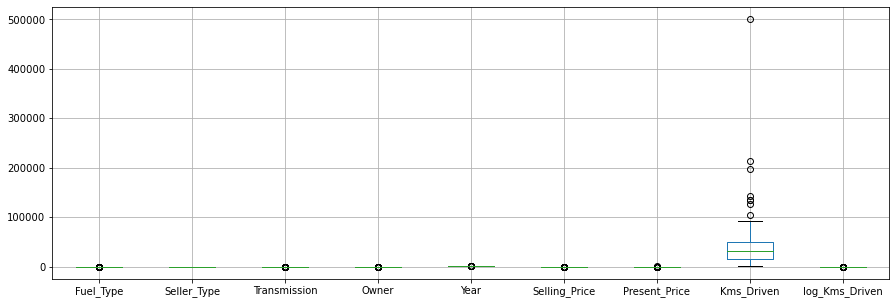

In [36]:
CarDekho_Data_Proces.boxplot(figsize=(15,5))

In [37]:
#This fuction is used to download the files from google collab.
#CarDekho_Data_Proces.to_csv("CarDekho.csv")
#files.download("CarDekho.csv")

Before Running into the Modeling Part we would to do some Hypothesis Testing.

In [38]:
CarDekho_Data_Proces.head()

,Fuel_Type,Seller_Type,Transmission,Owner,Year,Selling_Price,Present_Price,Kms_Driven,log_Kms_Driven
0,2,0,1,0,2014.0,3.35,5.59,27000.0,4.431364
1,1,0,1,0,2013.0,4.75,9.54,43000.0,4.633468
2,2,0,1,0,2017.0,7.25,9.85,6900.0,3.838849
3,2,0,1,0,2011.0,2.85,4.15,5200.0,3.716003
4,1,0,1,0,2014.0,4.60,6.87,42450.0,4.627878


**Reseach Question:**

Through out all the passed year Cardekho.com is in the market the average price of the selling cars remained 5.5 lakhs.Cardekho.com claims that the price have not been changed and its the same average selling price.

**Population:**All the data Cardekho.com has till present year.

Now we will frame the null and alternate hypothesis as;

**Null Hypothesis:**The average selling price of car is 5.5 lakhs.

> H0 : myu(u) = 5.5

**Alternate Hypothesis:**The average selling price of the cars have dropped below and is 4.6 now.

> H1: myu(u) != 5.5.    # != denotes not equal.

Data: we have the sample data from the Cardekho.com over the various years and will be doing hypothesis testing on that.

so we will perform the ttest(two tail) as we have the sample standard deviation,and will take the confidence level of 95% which gives the alpa=0.05.






In [39]:
from scipy import stats #importing the stats based library.

In [40]:
stats.ttest_1samp(a=CarDekho_Data_Proces["Selling_Price"],popmean=5.5) 

Ttest_1sampResult(statistic=-2.862780949897249, pvalue=0.004495114430610543)

here we can see that the:

> Pvalue (0.05)>(0.0449)
so we can conclude that we have sufficient evidence  to reject the null hypothesis(H0),and accept the alternate hypothesis(H1).

> It means that the average selling price of the car is not 5.5.

> Here the type 1 error is 0.05 we kept is as low as possible because type one error is critical for us in the hypothesis.







Research question:
Cardekho.com being in the business of selling cars says that most of the cars which we buy get sold for just some price high so the average price overall of present price and selling price comes same at last.

Population: All the data Cardekho.com has till present.

Now we will frame the Null and Alternate Hypothesis.

**Null Hypothesis:** The average selling and present price is same.

> H0 : myu(u1) = myu(u2)

**Alternate Hypothesis:** The average selling and present price is not same.

> H1 : myu(u1) != myu(u2)   # != means not equal.

**Data:** we have the sample data of the selling and present price over various year of cardekho.com.

so here we will perform the Annova:One factor as here we need to see the difference bettwen the two means of different features.

Hands down to excel for one click in this case,so we will do this analysis there and will undersatand the output for ours analysis.





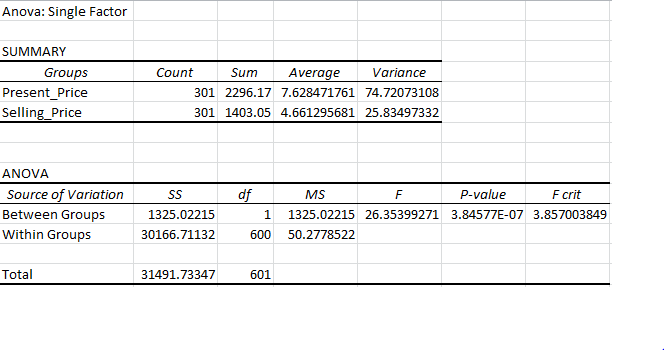

From The above,we can see that we have the:

> F(26.35) > F crit(3.85)

> We have sufficient evidence to reject the Null Hypothesis(H0) and accept the Alternate Hypothesis(H1).

> So,the conclusison is the average selling price and average present price of the cars is not same they are different.












**Lets apply the Linear Regression:**

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score


In [42]:
X=CarDekho_Data_Proces.drop(["Selling_Price"],axis=1)
Y=CarDekho_Data_Proces["Selling_Price"]

In [43]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=28)

**Feature scaling**

We will apply StandardScaler as:
StandardScaler assumes your data is normally distributed within each feature and will scale them so that the distribution is now centered around 0, with a standard deviation of 1.

In [44]:
from sklearn.preprocessing import StandardScaler


In [45]:
Sc=StandardScaler()
X_train=Sc.fit_transform(X_train)
X_test=Sc.fit_transform(X_test)

In [46]:
le=LinearRegression()
le.fit(X_train,Y_train)
y_pred=le.predict(X_test)

Lets also check the R2 score so that we can see how well its performing.

In [47]:
from sklearn.metrics import r2_score

In [48]:
r2_score(Y_test,y_pred)

0.8029011543781708

Now lets compare the actual and predicted values.

In [49]:
x=CarDekho_Data_Proces.drop(["Selling_Price"],axis=1) #Independent variables
y=CarDekho_Data_Proces["Selling_Price"] #Dependent Variables

In [50]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

Here we can see that:

> We are acheving the R_squared of 0.918 which is very good.

> We nned to have a look on Adjusted R_sqr and P value as it will help us in tunning the model further.





In [51]:
model=sm.OLS(endog=y,exog=x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              408.6
Date:                Sat, 01 Oct 2022   Prob (F-statistic):                   5.08e-154
Time:                        15:34:05   Log-Likelihood:                         -632.15
No. Observations:                 301   AIC:                                      1280.
Df Residuals:                     293   BIC:                                      1310.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Fuel_Type         -1.9683      0.309     -6.360      0.000      -2.577      -1.359
Seller_Type       -1.5381      0.300     -5.127      0.000      -2.129      -0.948
Transmission      -1.5221      0.376     -4.047      0.000      -2.262      -0.782
Owner             -1.0184      0.553     -1.841      0.067      -2.107       0.070
Year               0.0066      0.001      7.368      0.000       0.005       0.008
Present_Price      0.4414      0.018     24.696      0.000       0.406       0.477
Kms_Driven     -1.229e-05   4.34e-06     -2.831      0.005   -2.08e-05   -3.74e-06
log_Kms_Driven    -1.3906      0.399     -3.482      0.001      -2.177      -0.605
==============================================================================
Omnibus:                       54.140   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.327
Skew:                           0.489   Prob(JB):                     7.72e-80
Kurtosis:                       8.300   Cond. No.                     2.59e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


Now we will further tune the model:

> Let us remove the **Owner** variable as it is more then our p Value i.e.(0.05) acting like insignificant.

> We also checked our Adj R_sqr should not drop.






In [52]:
x=CarDekho_Data_Proces.drop(["Selling_Price","Owner"],axis=1) #Independent variables
y=CarDekho_Data_Proces["Selling_Price"] #Dependent Variables

Finally we have the best fit model with all significant Indipendent values and a good score of Adj R2 91.5 %.

In [53]:
model=sm.OLS(endog=y,exog=x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              462.7
Date:                Sat, 01 Oct 2022   Prob (F-statistic):                   1.22e-154
Time:                        15:34:05   Log-Likelihood:                         -633.88
No. Observations:                 301   AIC:                                      1282.
Df Residuals:                     294   BIC:                                      1308.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Fuel_Type         -1.9941      0.310     -6.424      0.000      -2.605      -1.383
Seller_Type       -1.6152      0.298     -5.415      0.000      -2.202      -1.028
Transmission      -1.5129      0.378     -4.007      0.000      -2.256      -0.770
Year               0.0067      0.001      7.527      0.000       0.005       0.009
Present_Price      0.4401      0.018     24.544      0.000       0.405       0.475
Kms_Driven     -1.223e-05   4.36e-06     -2.808      0.005   -2.08e-05   -3.66e-06
log_Kms_Driven    -1.4491      0.400     -3.625      0.000      -2.236      -0.662
==============================================================================
Omnibus:                       52.910   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              372.060
Skew:                           0.449   Prob(JB):                     1.61e-81
Kurtosis:                       8.372   Cond. No.                     1.99e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""